In [ ]:
%pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10588 sha256=441bfb0b8c62a5e524bfbabd0e7f0b7aea768fa04e66c400f9678dca2d2784cc
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Minisom library and module is used for performing Self Organizing Maps
from minisom import MiniSom

In [ ]:
#loading dataset
data = pd.read_csv('/content/Credit_Card_Applications.csv')
# X
data

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [ ]:
# Shape of the data:
data.shape

(690, 16)

In [ ]:
# Info of the data:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [ ]:
# Defining X variables for the input of SOM
X = data.iloc[:, 1:14].values
y = data.iloc[:, -1].values
# X variables:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,22.08,11.460,2.0,4.0,4.0,1.585,0.0,0.0,0.0,1.0,2.0,100.0
1,0.0,22.67,7.000,2.0,8.0,4.0,0.165,0.0,0.0,0.0,0.0,2.0,160.0
2,0.0,29.58,1.750,1.0,4.0,4.0,1.250,0.0,0.0,0.0,1.0,2.0,280.0
3,0.0,21.67,11.500,1.0,5.0,3.0,0.000,1.0,1.0,11.0,1.0,2.0,0.0
4,1.0,20.17,8.170,2.0,6.0,4.0,1.960,1.0,1.0,14.0,0.0,2.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1.0,31.57,10.500,2.0,14.0,4.0,6.500,1.0,0.0,0.0,0.0,2.0,0.0
686,1.0,20.67,0.415,2.0,8.0,4.0,0.125,0.0,0.0,0.0,0.0,2.0,0.0
687,0.0,18.83,9.540,2.0,6.0,4.0,0.085,1.0,0.0,0.0,0.0,2.0,100.0
688,0.0,27.42,14.500,2.0,14.0,8.0,3.085,1.0,1.0,1.0,0.0,2.0,120.0


In [ ]:
#Scaling the X variables:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.125263,0.409286,0.5,0.230769,0.375,0.055614,0.0,0.0,0.000000,1.0,0.5,0.05
1,0.0,0.134135,0.250000,0.5,0.538462,0.375,0.005789,0.0,0.0,0.000000,0.0,0.5,0.08
2,0.0,0.238045,0.062500,0.0,0.230769,0.375,0.043860,0.0,0.0,0.000000,1.0,0.5,0.14
3,0.0,0.119098,0.410714,0.0,0.307692,0.250,0.000000,1.0,1.0,0.164179,1.0,0.5,0.00
4,1.0,0.096541,0.291786,0.5,0.384615,0.375,0.068772,1.0,1.0,0.208955,0.0,0.5,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1.0,0.267970,0.375000,0.5,1.000000,0.375,0.228070,1.0,0.0,0.000000,0.0,0.5,0.00
686,1.0,0.104060,0.014821,0.5,0.538462,0.375,0.004386,0.0,0.0,0.000000,0.0,0.5,0.00
687,0.0,0.076391,0.340714,0.5,0.384615,0.375,0.002982,1.0,0.0,0.000000,0.0,0.5,0.05
688,0.0,0.205564,0.517857,0.5,1.000000,0.875,0.108246,1.0,1.0,0.014925,0.0,0.5,0.06


In [ ]:
# Set the hyper parameters
som_grid_rows = 10
som_grid_columns = 10
iterations = 20000
sigma = 1
learning_rate = 0.5

In [ ]:
# define SOM:
som = MiniSom(x = som_grid_rows, y = som_grid_columns, input_len=13, sigma=sigma, learning_rate=learning_rate)

In [ ]:
# Initializing the weights
som.random_weights_init(X)

In [ ]:
# Training
som.train_random(X, iterations)

In [ ]:
# Returns the distance map from the weights:
som.distance_map()

array([[0.20653198, 0.26974767, 0.33722338, 0.41097152, 0.44517498,
        0.43446436, 0.40562134, 0.30619654, 0.39891016, 0.27533383],
       [0.32591069, 0.51110141, 0.69700109, 0.84549169, 0.5824305 ,
        0.75890413, 0.76310135, 0.71777665, 0.6568074 , 0.49324191],
       [0.28249851, 0.54822149, 0.88536082, 0.68228018, 0.73487754,
        0.68103367, 1.        , 0.83103608, 0.77700266, 0.36176047],
       [0.3387195 , 0.72359102, 0.70218009, 0.58234375, 0.6105265 ,
        0.72923703, 0.76232065, 0.7240216 , 0.640658  , 0.33963576],
       [0.43271479, 0.72226374, 0.71165394, 0.53212154, 0.53778288,
        0.65066009, 0.49582524, 0.64935929, 0.75286207, 0.54040899],
       [0.47416141, 0.75150096, 0.98499814, 0.90754891, 0.98533674,
        0.57964916, 0.53584256, 0.73957779, 0.66135432, 0.46095337],
       [0.44125157, 0.84583117, 0.79989655, 0.9438778 , 0.97971007,
        0.76701044, 0.60679182, 0.60504826, 0.69284463, 0.32292523],
       [0.40889345, 0.59309582, 0.8016756

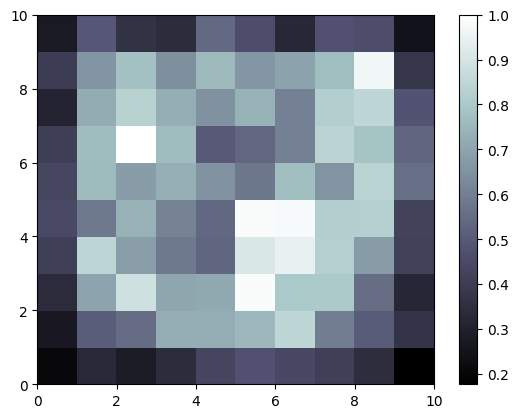

In [ ]:
from pylab import plot, axis, show, pcolor, colorbar, bone
bone()
pcolor(som.distance_map().T)       # Distance map as background
colorbar()
show()

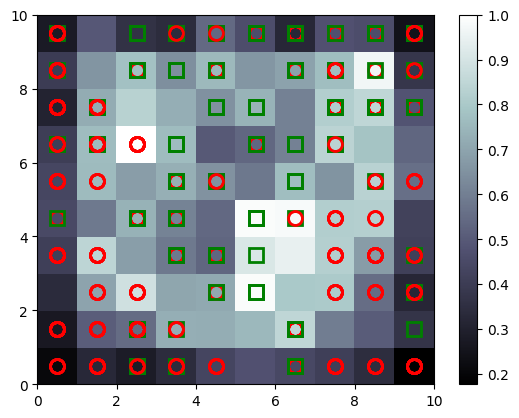

In [ ]:
bone()
pcolor(som.distance_map().T)
colorbar() #gives legend
markers = ['o', 's']                     # if the observation is fraud then red circular color or else green square
colors = ['r', 'g']
for i, x in enumerate(X):
  w = som.winner(x)
  plot(w[0] + 0.5,
       w[1] + 0.5,
       markers[y[i]],
       markeredgecolor = colors[y[i]],
       markerfacecolor = 'None',
       markersize = 10,
       markeredgewidth = 2)
show()

In [ ]:
mappings = som.win_map(X)

mappings

mappings.keys()

len(mappings.keys())

mappings[(9,8)]

frauds = np.concatenate((mappings[(0,9)], mappings[(8,9)]), axis = 0)

frauds

# the list of customers who are frauds:

frauds1 = sc.inverse_transform(frauds)

pd.DataFrame(frauds1)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,18.83,3.540,1.0,1.0,1.0,0.000,0.0,0.0,0.0,1.0,2.0,180.0
1,1.0,24.50,13.335,1.0,6.0,4.0,0.040,0.0,0.0,0.0,1.0,2.0,120.0
2,1.0,37.50,1.125,1.0,2.0,4.0,1.500,0.0,0.0,0.0,1.0,2.0,431.0
3,1.0,34.00,5.085,1.0,3.0,5.0,1.085,0.0,0.0,0.0,1.0,2.0,480.0
4,1.0,22.50,11.500,1.0,7.0,4.0,1.500,0.0,0.0,0.0,1.0,2.0,0.0
5,1.0,31.57,0.040,1.0,2.0,4.0,4.250,0.0,0.0,0.0,1.0,2.0,460.0
6,1.0,19.17,4.000,1.0,3.0,4.0,1.000,0.0,0.0,0.0,1.0,2.0,360.0
7,1.0,22.00,7.835,1.0,3.0,5.0,0.165,0.0,0.0,0.0,1.0,2.0,184.0
8,1.0,31.57,4.000,1.0,3.0,4.0,0.085,0.0,0.0,0.0,1.0,2.0,411.0
9,1.0,21.50,11.500,2.0,3.0,4.0,0.500,1.0,0.0,0.0,1.0,2.0,100.0
